In [1]:
# importing Frameworks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import yfinance as yf

import tensorflow as tf
import keras
from keras.models import Sequential

In [2]:
# defining variables to download the google stock's data
ticker = "GOOG"
start = "2013-10-13"
end = "2023-10-15"

In [3]:
# downloading the google stock data
data = yf.download(tickers = ticker, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# printing the downloaded data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-14,21.585592,21.824448,21.553961,21.820959,21.820959,49930453
2013-10-15,21.812243,22.058071,21.768408,21.967909,21.967909,63914673
2013-10-16,22.064049,22.374386,22.017721,22.366913,22.366913,80604999
2013-10-17,22.241385,22.338770,22.060562,22.136776,22.136776,170902191
2013-10-18,24.323330,25.291700,24.259071,25.190828,25.190828,464390148


In [5]:
# removing the Adj Close column
data.drop('Adj Close', axis = 1, inplace = True)

In [6]:
# removing Date column from index position
data.reset_index()

,Date,Open,High,Low,Close,Volume
0,2013-10-14,21.585592,21.824448,21.553961,21.820959,49930453
1,2013-10-15,21.812243,22.058071,21.768408,21.967909,63914673
2,2013-10-16,22.064049,22.374386,22.017721,22.366913,80604999
3,2013-10-17,22.241385,22.338770,22.060562,22.136776,170902191
4,2013-10-18,24.323330,25.291700,24.259071,25.190828,464390148
...,...,...,...,...,...,...
2513,2023-10-09,137.990005,139.970001,136.699997,139.500000,16599100
2514,2023-10-10,139.509995,140.740005,138.429993,139.199997,19554900
2515,2023-10-11,139.850006,142.220001,139.839996,141.699997,20146300
2516,2023-10-12,142.160004,142.380005,139.449997,140.289993,18173100


# Visualizations

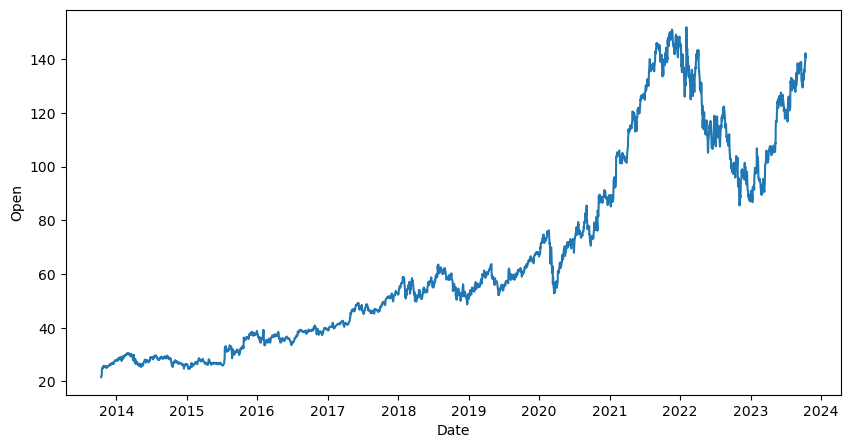

In [7]:
# creating plot for open value
plt.figure(figsize = (10,5))
sns.lineplot(data = data, y = 'Open', x = 'Date')
plt.show()

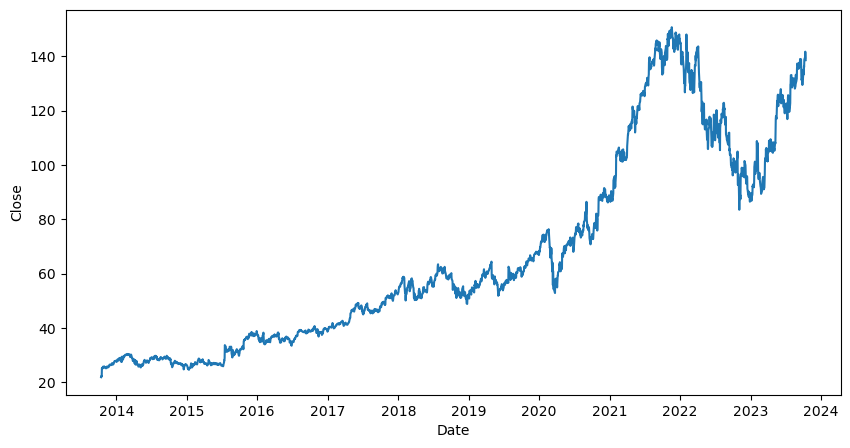

In [8]:
# creating plot for Close value
plt.figure(figsize = (10,5))
sns.lineplot(data = data, y = 'Close', x = 'Date')
plt.show()

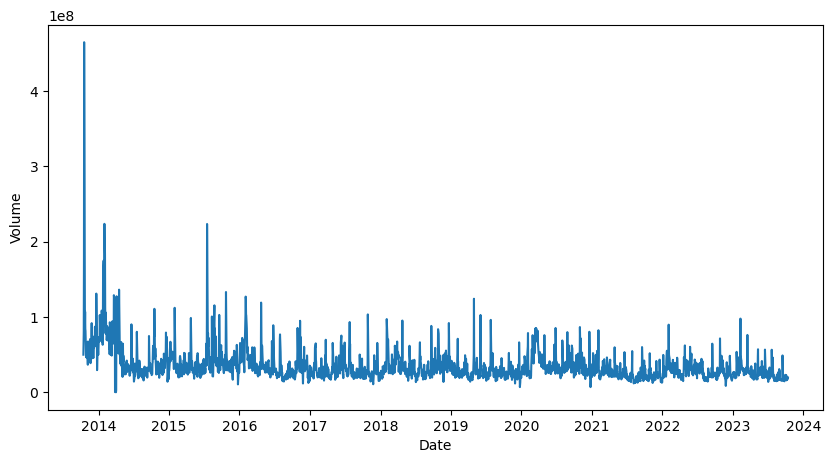

In [9]:
# creating plot for Volume value
plt.figure(figsize = (10,5))
sns.lineplot(data = data, y = 'Volume', x = 'Date')
plt.show()

## Moving Averages

In [10]:
# calculating moving average for 50 days opening value
ma50_open = data['Open'].rolling(50).mean()

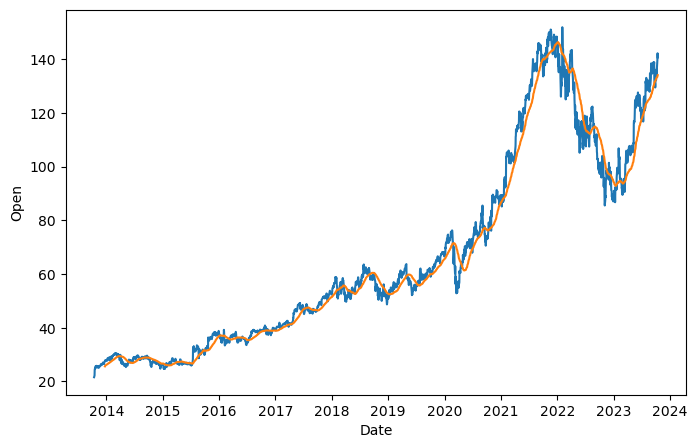

In [11]:
# creating plot for open value with moving average
plt.figure(figsize = (8,5))
sns.lineplot(data = data, y = 'Open', x = 'Date')
sns.lineplot(data = data, y = ma50_open, x = 'Date')
plt.show()

In [12]:
# calculating rolling average for 50 days closing value
ma50_close = data['Close'].rolling(50).mean()

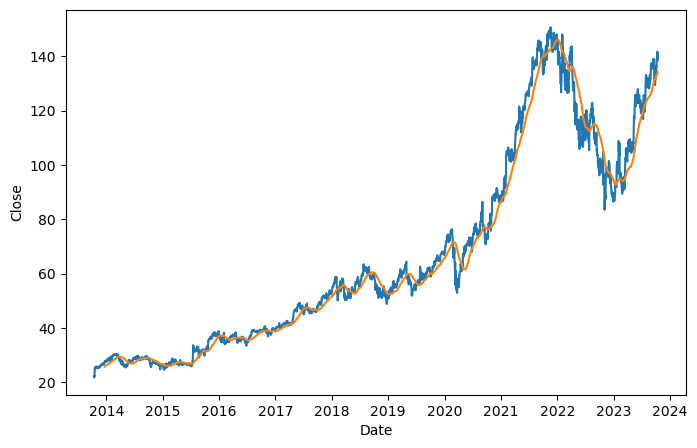

In [13]:
# creating plot for open value with moving average
plt.figure(figsize = (8,5))
sns.lineplot(data = data, y = 'Close', x = 'Date')
sns.lineplot(data = data, y = ma50_close, x = 'Date')
plt.show()

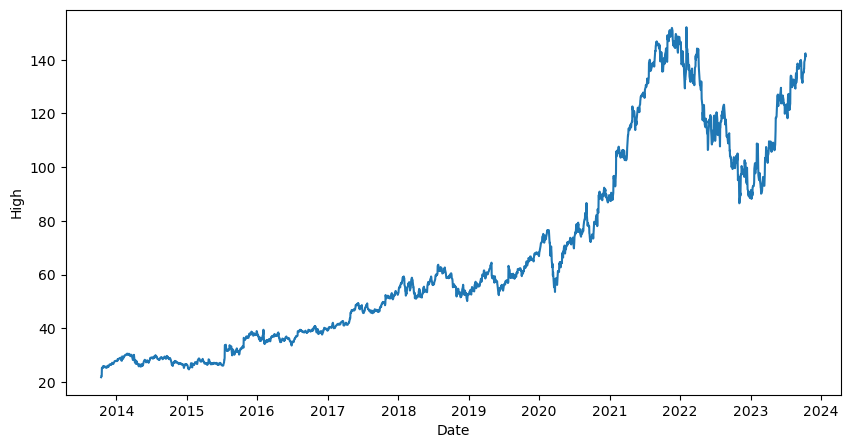

In [14]:
# creating plot for high value
plt.figure(figsize = (10,5))
sns.lineplot(data = data, y = 'High', x = 'Date')
plt.show()

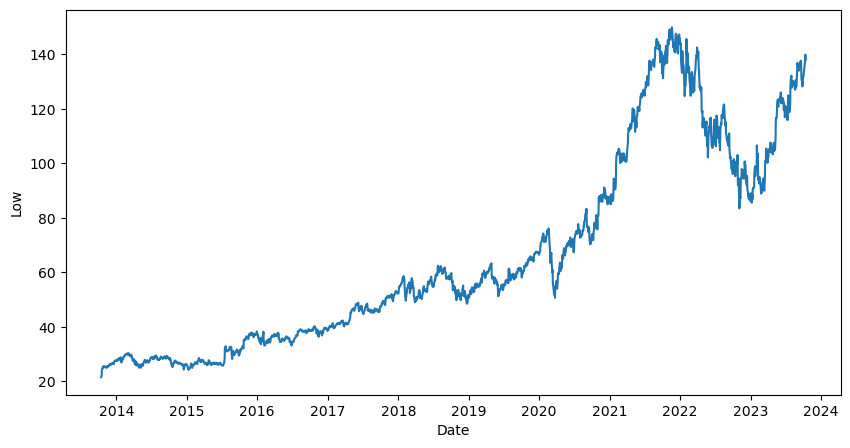

In [15]:
# creating plot for Low value
plt.figure(figsize = (10,5))
sns.lineplot(data = data, y = 'Low', x = 'Date')
plt.show()

# Train Test Split of data

In [16]:
# shape of data
data.shape

(2518, 5)

In [33]:
# splitting the data in training and testing i.e. 80% Training and 20% testing
data_train = pd.DataFrame(data['Close'][0:int(len(data)*0.8)])
data_test = pd.DataFrame(data['Close'][int(len(data)*0.8): int(len(data))])

In [34]:
# shape of training and testing data
print(f"Shape of training data : {data_train.shape}")
print(f"Shape of testing data : {data_test.shape}")


Shape of training data : (2014, 1)
Shape of testing data : (504, 1)


In [35]:
# creating object for MinMaxscaler
mn = MinMaxScaler()

# Scaling the training data
data_train_scaled = mn.fit_transform(data_train)

In [36]:
# creating windows for the lstm model

x_train = []
y_train = []

for i in range(60, data_train_scaled.shape[0]):
    x_train.append(data_train_scaled[i-60 : i])
    y_train.append(data_train_scaled[i, 0])

# converting x_train and y_train into arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
len(x_train)

1954

In [38]:
x_train.shape

(1954, 60, 1)

# Machine Learning Model Using LSTM

In [75]:
# creating LSTM model for Prediction
model = Sequential([
    tf.keras.layers.LSTM(60, return_sequences = True,
                         input_shape = (x_train.shape[1], 1)),
    
    tf.keras.layers.LSTM(60, return_sequences = True),
    
    tf.keras.layers.LSTM(60),
    
    tf.keras.layers.Dense(1)
])

In [76]:
# getting summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 60)            14880     
                                                                 
 lstm_7 (LSTM)               (None, 60, 60)            29040     
                                                                 
 lstm_8 (LSTM)               (None, 60)                29040     
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 73021 (285.24 KB)
Trainable params: 73021 (285.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# compiling the model
model.compile(optimizer = 'adam',
             loss = 'mean_squared_error')

In [78]:
# training the model

epochs = 30

model.fit(x_train, y_train, epochs = epochs)

Epoch 1/30
62/62 [==============================] - 10s 49ms/step - loss: 0.0092
Epoch 2/30
62/62 [==============================] - 3s 49ms/step - loss: 4.7741e-04
Epoch 3/30
62/62 [==============================] - 3s 48ms/step - loss: 4.7694e-04
Epoch 4/30
62/62 [==============================] - 4s 58ms/step - loss: 4.7860e-04
Epoch 5/30
62/62 [==============================] - 4s 58ms/step - loss: 4.8496e-04
Epoch 6/30
62/62 [==============================] - 6s 95ms/step - loss: 4.6030e-04
Epoch 7/30
62/62 [==============================] - 5s 83ms/step - loss: 4.2542e-04
Epoch 8/30
62/62 [==============================] - 6s 96ms/step - loss: 4.5590e-04
Epoch 9/30
62/62 [==============================] - 5s 77ms/step - loss: 3.7575e-04
Epoch 10/30
62/62 [==============================] - 4s 69ms/step - loss: 4.0722e-04
Epoch 11/30
62/62 [==============================] - 6s 89ms/step - loss: 3.7172e-04
Epoch 12/30
62/62 [==============================] - 5s 81ms/step - loss: 3.2

# Saving the Model

In [95]:
model.save("stock_prediction.pkl")

INFO:tensorflow:Assets written to: stock_prediction.pkl\assets


INFO:tensorflow:Assets written to: stock_prediction.pkl\assets


# Testing the model 

In [80]:
data_test.head()

,Close
Date,
2021-10-13,137.899994
2021-10-14,141.412003
2021-10-15,141.675003
2021-10-18,142.960495
2021-10-19,143.822006


In [81]:
# getting the last 60 days data to create window for the first value in the data_test variable 
past_60_days = data_train.tail(60)

In [82]:
# concatenating the two dataframes
final_test = pd.concat([past_60_days, data_test], axis = 0)
final_test

,Close
Date,
2021-07-20,131.101501
2021-07-21,132.600494
2021-07-22,133.328506
2021-07-23,137.815994
2021-07-26,139.644501
...,...
2023-10-09,139.500000
2023-10-10,139.199997
2023-10-11,141.699997


In [83]:
# scaling the data
final_test_scaled = mn.fit_transform(final_test)

In [84]:
# final testingb data shape
final_test_scaled.shape

(564, 1)

In [85]:
# creating windows for testing phase

x_test = []
y_test = []

for i in range(60, final_test_scaled.shape[0]):
    x_test.append(final_test_scaled[i-60: i])
    y_test.append(final_test_scaled[i, 0])
    
# converting them into arrays
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(504, 60, 1)
(504,)


In [86]:
# Predictions

y_pred = model.predict(x_test)

# printing the predicted results
#y_pred = y_pred.reshape
y_pred.shape

16/16 [==============================] - 2s 28ms/step


(504, 1)

In [87]:
# printing the MinMaxScaler scale factor
mn.scale_

array([0.01487675])

In [89]:
# defining scale factor
scale_factor = 1 / 0.01487675

# converting the scaled values into original values/ closing price
y_test_actual = y_test * scale_factor
y_pred_actual = y_pred * scale_factor

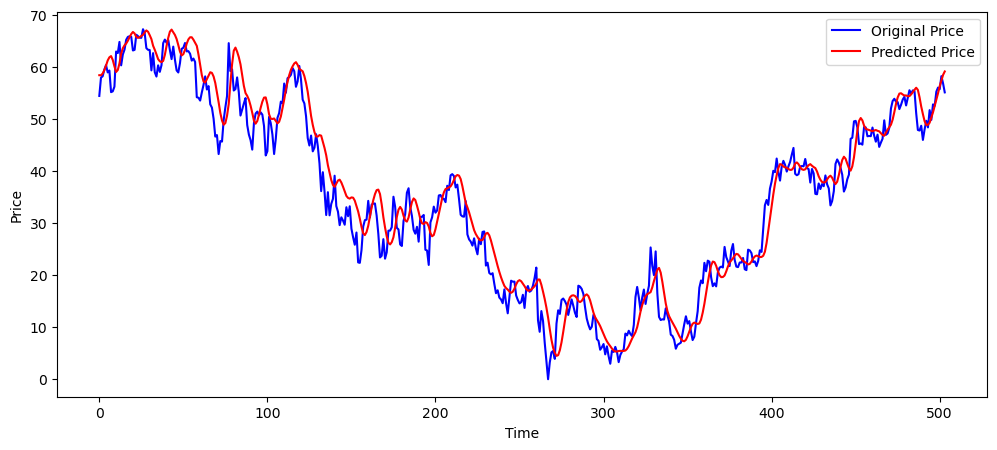

In [93]:
# plotting the actual and predicted values on a line plot

plt.figure(figsize = (12,5))
plt.plot(y_test_actual, 'b', label = "Original Price")
plt.plot(y_pred_actual, 'r', label = "Predicted Price")

# providing labels to both axis
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()